In [1]:
# https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
# https://fcpython.com/machine-learning/introduction-to-k-means-with-python-clustering-shot-creators-in-the-premier-league

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mplsoccer import FontManager
URL = 'https://github.com/googlefonts/BevanFont/blob/main/fonts/ttf/Bevan-Regular.ttf?raw=true'
fprop = FontManager(URL).prop
plt.rcParams['figure.dpi'] = 300
sns.set(rc={'axes.facecolor':'#fbf9f4', 'figure.facecolor':'#fbf9f4', 'text.color':'#4A2E19'})

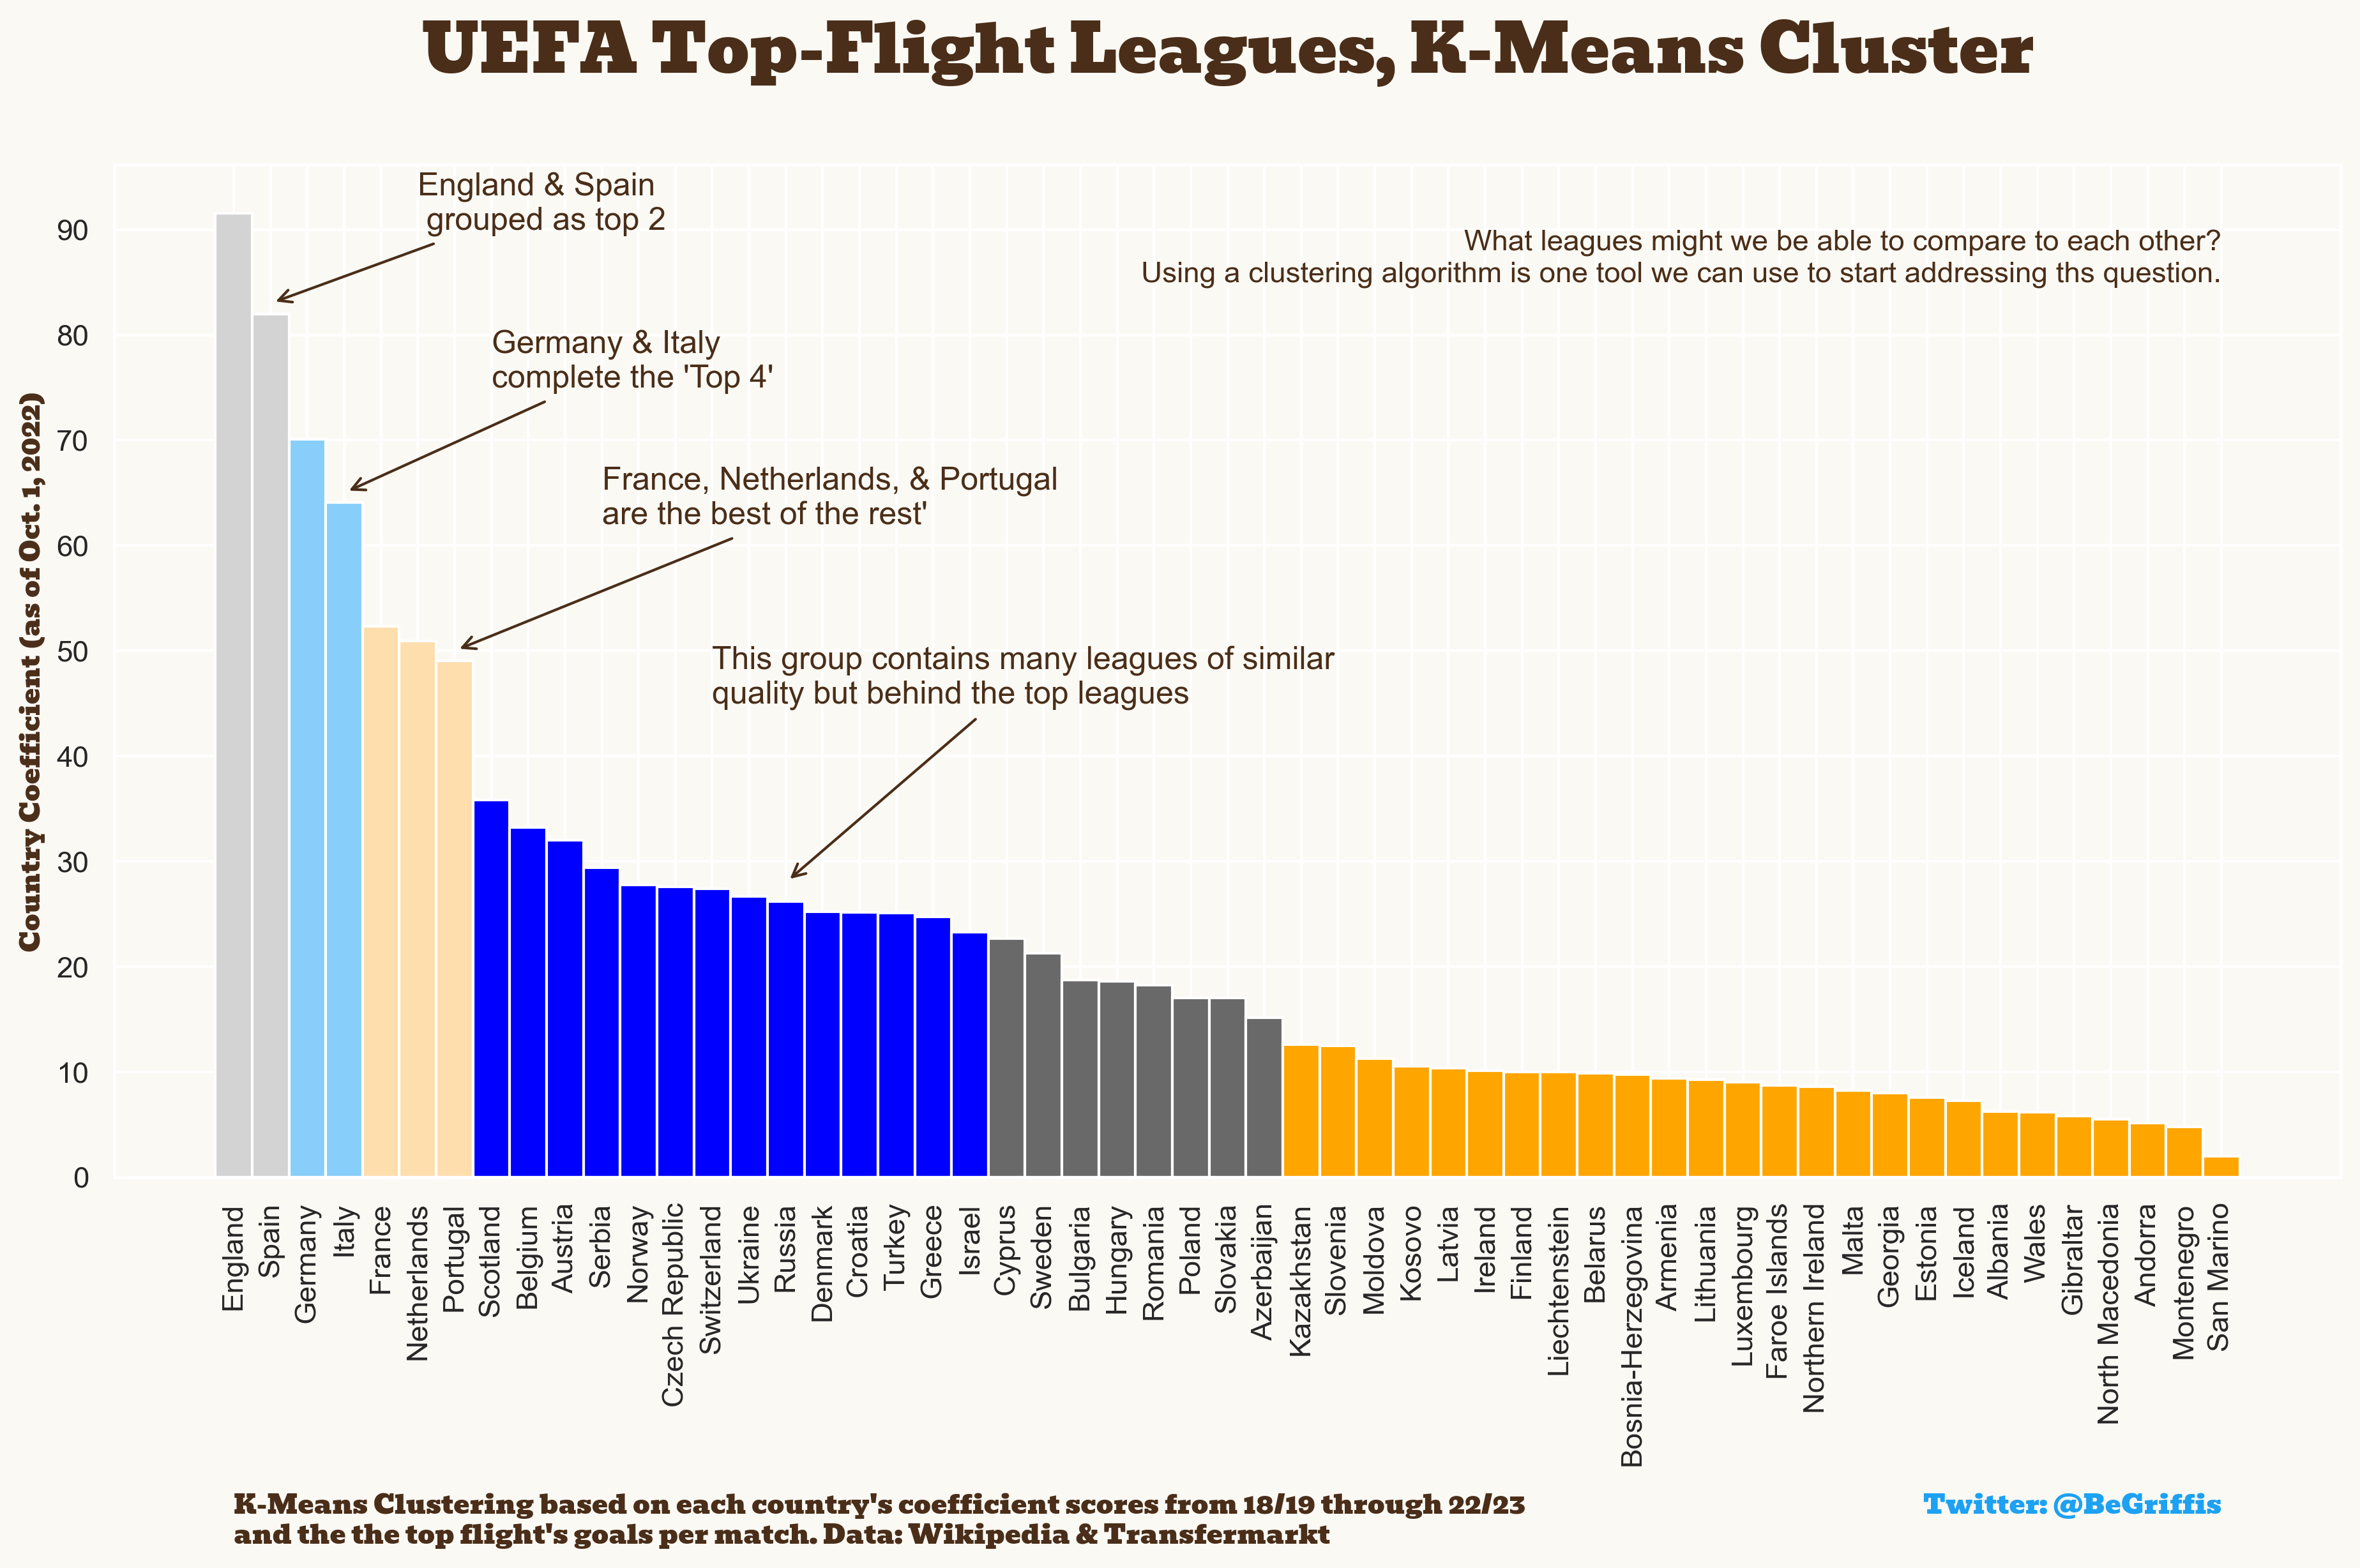

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/griffisben/misc-code/main/files/UEFA%20Coefficient.csv')

x = data.loc[:,['2018–19', '2019–20', '2020–21', '2021–22', '2022–23', 'Goals Per Match']]

kmeans = KMeans(6)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 

y_km = kmeans.fit_predict(x)
data['Cluster'] = y_km
data['color'] = ''
for i in range(len(data)):
    if data.Cluster[i] == 0:
        data.color[i] = 'blue'
    if data.Cluster[i] == 1:
        data.color[i] = 'lightskyblue'
    if data.Cluster[i] == 2:
        data.color[i] = 'orange'
    if data.Cluster[i] == 3:
        data.color[i] = 'navajowhite'
    if data.Cluster[i] == 4:
        data.color[i] = 'dimgrey'
    if data.Cluster[i] == 5:
        data.color[i] = 'lightgrey'
    if data.Cluster[i] == 6:
        data.color[i] = 'forestgreen'
    if data.Cluster[i] == 7:
        data.color[i] = 'lightgreen'

plt.figure(figsize=(15,7))
plt.bar(data=data, x="Country", height="Total", color='color',
           width=1)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Country Coefficient (as of Oct. 1, 2022)',
          color='#4A2E19', fontproperties=fprop)
plt.yticks(np.arange(0, max(data['Total']), 10))

plt.text(54/2, 110, "UEFA Top-Flight Leagues, K-Means Cluster",
                  color='#4A2E19',
                  va='top', ha='center',
                  fontproperties=fprop,
                  fontsize=25)
plt.text(0, -30, "K-Means Clustering based on each country's coefficient scores from 18/19 through 22/23\nand the the top flight's goals per match. Data: Wikipedia & Transfermarkt",
                  color='#4A2E19',
                  va='top', ha='left',
                  fontproperties=fprop,
                  fontsize=10)
plt.text(54, -30, "Twitter: @BeGriffis",
                  color='#1DA1F2',
                  va='top', ha='right',
                  fontproperties=fprop,
                  fontsize=10)

plt.annotate("England & Spain\n grouped as top 2",
            xy=(1, 83), xycoords='data',
            xytext=(5, 90), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           color='#4A2E19'),
            )
plt.annotate("Germany & Italy\ncomplete the 'Top 4'",
            xy=(3, 65), xycoords='data',
            xytext=(7, 75), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           color='#4A2E19'),
            )
plt.annotate("France, Netherlands, & Portugal\nare the best of the rest'",
            xy=(6, 50), xycoords='data',
            xytext=(10, 62), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           color='#4A2E19'),
            )
plt.annotate("This group contains many leagues of similar\nquality but behind the top leagues",
            xy=(15, 28), xycoords='data',
            xytext=(13, 45), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           color='#4A2E19'),
            )

plt.text(54, 90, "What leagues might we be able to compare to each other?",
                  color='#4A2E19',
                  va='top', ha='right',
                  fontsize=11)
plt.text(54, 87, "Using a clustering algorithm is one tool we can use to start addressing ths question.",
                  color='#4A2E19',
                  va='top', ha='right',
                  fontsize=11)


plt.savefig("UEFA Coefficient K Means.png", dpi = 300, bbox_inches='tight')
